In [51]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [52]:
%cd /content/drive/My Drive/Courses/CS247/247 Project
%ls

/content/drive/My Drive/Courses/CS247/247 Project
 analysis.ipynb
 christina-finetuning-hatebert.ipynb
'Christina marg-finetuning-tweetbert.ipynb'
'Claire Christina marg-finetuning-tweetbert.ipynb'
 claire-finetuning-tweetbert.ipynb
 copy-marg-load-for-csv.ipynb
'Copy of Claire Christina marg-finetuning-tweetbert.ipynb'
'Copy of Claire Copy of Copy of Copy of marg-finetuning-tweetbert (1).ipynb'
'Copy of Claire Copy of Copy of Copy of marg-finetuning-tweetbert.ipynb'
'Copy of Copy of marg-finetuning-tweetbert.ipynb'
'Copy of marg-finetuning-tweetbert.ipynb'
'CS 247 Final Presentation.gslides'
'CS 247 Project Results.gsheet'
 data/
 evp-marg-finetuning-tweetbert-full.ipynb
 finetuning-hatebert-full.ipynb
 finetuning-hatebert-topics.ipynb
 lda-split.ipynb
 lda-topic-modeling.ipynb
 marg-finetuning-tweetbert-full.ipynb
 marg-finetuning-tweetbert.ipynb
 marg-load-for-csv.ipynb
 models/
 nlpositionality-analysis.ipynb
'Project Ideas.gdoc'
'Project Proposal.gdoc'
 results/
 runs/
 tech-marg-

##TweetBert Analysis

In [53]:
import os
import pandas as pd
import re


def aggregate_runs(model_name, directory_name, test_set):
  path = "results/{}/{}".format(model_name, directory_name)
  agg_seed_df = pd.DataFrame()
  for filename in os.listdir(path):
    f = os.path.join(path, filename)
    seed = re.findall(r'\d+', filename)[-1]
    seed_df = pd.read_csv(f).sort_values(by=['annotator_id'])
    agg_seed_df["predictions_seed_{}".format(seed)] = list(seed_df['predictions'])
  test_set['predictions'] = agg_seed_df.mode(axis=1, dropna=False)
  return test_set


In [54]:
import pandas as pd
full = pd.read_csv('results/tweetbert/full/metric_results-full-seed-0-frozen.csv').sort_values(by=['annotator_id']).drop(['predictions'], axis=1)
full = aggregate_runs('tweetbert', 'full', full)

topic_0 = pd.read_csv('results/tweetbert/topic-0/metric_results-topic-0-seed-0-frozen.csv').sort_values(by=['annotator_id']).drop(['predictions'], axis=1)
topic_0 = aggregate_runs('tweetbert', 'topic-0', topic_0)

topic_1 = pd.read_csv('results/tweetbert/topic-1/metric_results-topic-1-seed-0-frozen.csv').sort_values(by=['annotator_id']).drop(['predictions'], axis=1)
topic_1 = aggregate_runs('tweetbert', 'topic-1', topic_1)

topic_2 = pd.read_csv('results/tweetbert/topic-2/metric_results-topic-2-seed-0-frozen.csv').sort_values(by=['annotator_id']).drop(['predictions'], axis=1)
topic_2 = aggregate_runs('tweetbert', 'topic-2', topic_2)



In [55]:
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score, precision_score, recall_score

np.seterr(divide='ignore', invalid='ignore')


def performance_stats(y_true, y_pred, subset):

  cnf_matrix = confusion_matrix(y_true, y_pred)


  FP = cnf_matrix.sum(axis=0) - np.diag(cnf_matrix)
  FN = cnf_matrix.sum(axis=1) - np.diag(cnf_matrix)
  TP = np.diag(cnf_matrix)
  TN = cnf_matrix.sum() - (FP + FN + TP)

  FP = FP.astype(float)
  FN = FN.astype(float)
  TP = TP.astype(float)
  TN = TN.astype(float)

  stats = {
    'data_subset': subset,
    # Sensitivity, hit rate, recall, or true positive rate
    'TPR' : np.divide(TP, (TP+FN) ),
    # Specificity or true negative rate
    'TNR' : np.divide(TN, (TN+FP) ),
    # Precision or positive predictive value
    'PPV' : np.divide(TP, (TP+FP) ),
    # Negative predictive value
    'NPV' : np.divide(TN, (TN+FN) ),
    # Fall out or false positive rate
    'FPR' : np.divide(FP, (FP+TN) ),
    # False negative rate
    'FNR' : np.divide(FN, (TP+FN) ),
    # False discovery rate
    'FDR' : np.divide(FP, (TP+FP) ),
    # Overall accuracy
    'ACC' : np.divide((TP+TN), (TP+FP+FN+TN) ),
    # Confusion matrix table
    'confusion_matrix': cnf_matrix,
    # Micro F1 score
    'Micro F1' : f1_score(y_true, y_pred, average='micro'),
    # Micro Precision score
    'Precision': precision_score(y_true, y_pred, average='micro'),
    # Micro Recall score
    'Recall': recall_score(y_true, y_pred, average='micro')
  }

  return stats



In [56]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

def confusion_visualization(y_true, y_pred, subset):
  # 0: 'Note Hate Speech', 1:'Notsure',  2:'Hate Speech'
  disp = ConfusionMatrixDisplay.from_predictions(y_true, y_pred, display_labels=['Note Hate Speech', 'Not Sure', 'Hate Speech'])
  disp.ax_.set_title('Confusion Matrix for Toxicity Classification for {} Dataset'.format(subset))
  plt.show()

{'data_subset': 'Full', 'TPR': array([0.1635514 , 0.00847458, 0.81214204]), 'TNR': array([0.82542886, 0.99461952, 0.15934066]), 'PPV': array([0.28806584, 0.125     , 0.60702055]), 'NPV': array([0.69557823, 0.91708009, 0.34661355]), 'FPR': array([0.17457114, 0.00538048, 0.84065934]), 'FNR': array([0.8364486 , 0.99152542, 0.18785796]), 'FDR': array([0.71193416, 0.875     , 0.39297945]), 'ACC': array([0.62579281, 0.91261452, 0.56095842]), 'confusion_matrix': array([[ 70,   0, 358],
       [ 16,   1, 101],
       [157,   7, 709]]), 'Micro F1': 0.5496828752642706, 'Precision': 0.5496828752642706, 'Recall': 0.5496828752642706}


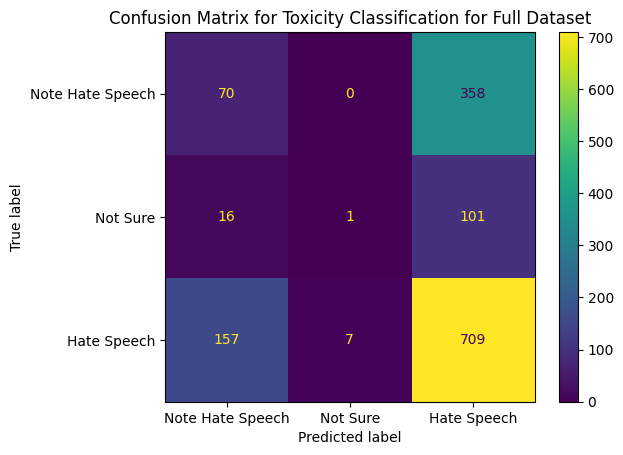

{'data_subset': 'Topic 0', 'TPR': array([0.29411765, 0.        , 0.7248062 ]), 'TNR': array([0.74747475, 0.97969543, 0.29714286]), 'PPV': array([0.34782609, 0.        , 0.60322581]), 'NPV': array([0.69811321, 0.90823529, 0.42276423]), 'FPR': array([0.25252525, 0.02030457, 0.70285714]), 'FNR': array([0.70588235, 1.        , 0.2751938 ]), 'FDR': array([0.65217391, 1.        , 0.39677419]), 'ACC': array([0.60508083, 0.89145497, 0.55196305]), 'confusion_matrix': array([[ 40,   4,  92],
       [  8,   0,  31],
       [ 67,   4, 187]]), 'Micro F1': 0.5242494226327945, 'Precision': 0.5242494226327945, 'Recall': 0.5242494226327945}


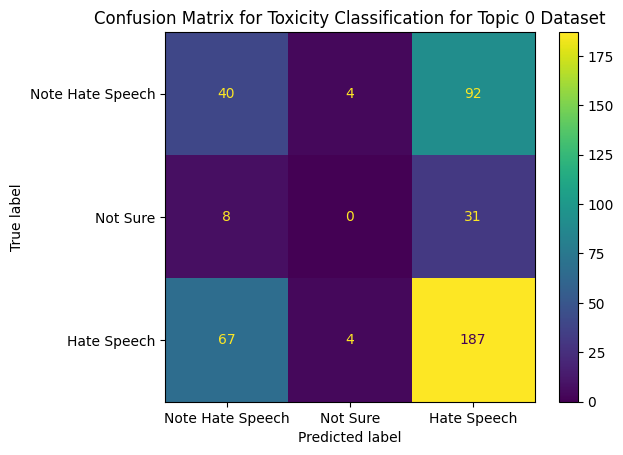

{'data_subset': 'Topic 1', 'TPR': array([0.24691358, 0.        , 0.77325581]), 'TNR': array([0.7751938 , 1.        , 0.23902439]), 'PPV': array([0.31496063,        nan, 0.63033175]), 'NPV': array([0.71090047, 0.92167577, 0.38582677]), 'FPR': array([0.2248062 , 0.        , 0.76097561]), 'FNR': array([0.75308642, 1.        , 0.22674419]), 'FDR': array([0.68503937,        nan, 0.36966825]), 'ACC': array([0.61930783, 0.92167577, 0.57377049]), 'confusion_matrix': array([[ 40,   0, 122],
       [  9,   0,  34],
       [ 78,   0, 266]]), 'Micro F1': 0.5573770491803278, 'Precision': 0.5573770491803278, 'Recall': 0.5573770491803278}


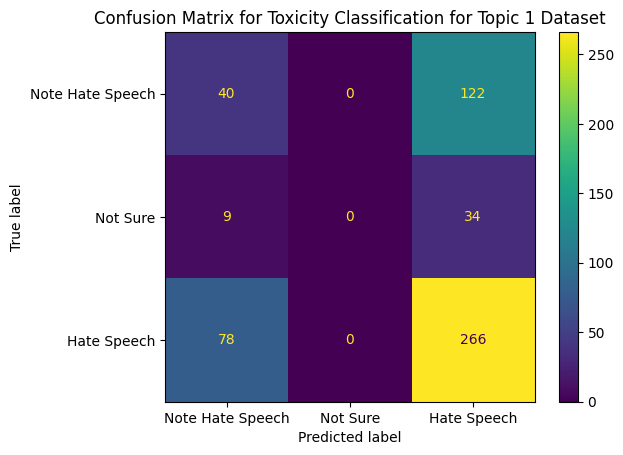

{'data_subset': 'Topic 2', 'TPR': array([0.28461538, 0.        , 0.69741697]), 'TNR': array([0.70684039, 1.        , 0.27108434]), 'PPV': array([0.29133858,        nan, 0.60967742]), 'NPV': array([0.7       , 0.91762014, 0.35433071]), 'FPR': array([0.29315961, 0.        , 0.72891566]), 'FNR': array([0.71538462, 1.        , 0.30258303]), 'FDR': array([0.70866142,        nan, 0.39032258]), 'ACC': array([0.5812357 , 0.91762014, 0.53546911]), 'confusion_matrix': array([[ 37,   0,  93],
       [  8,   0,  28],
       [ 82,   0, 189]]), 'Micro F1': 0.517162471395881, 'Precision': 0.517162471395881, 'Recall': 0.517162471395881}


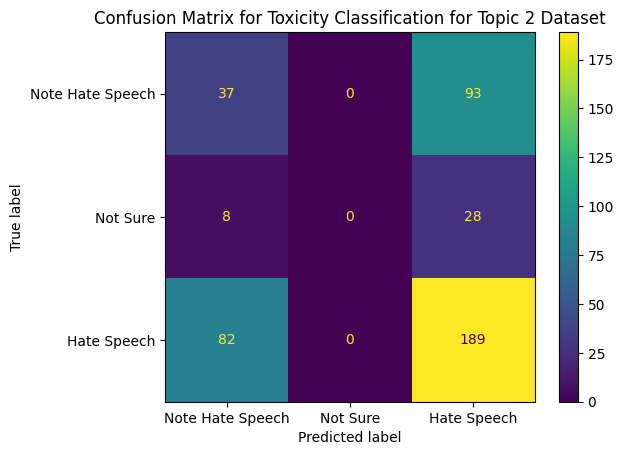

In [57]:
full_stats = performance_stats(full['labels'], full['predictions'], 'Full')
print(full_stats)
confusion_visualization(full['labels'], full['predictions'], 'Full')

topic_0_stats = performance_stats(topic_0['labels'], topic_0['predictions'], 'Topic 0')
print(topic_0_stats)
confusion_visualization(topic_0['labels'], topic_0['predictions'], 'Topic 0')

topic_1_stats = performance_stats(topic_1['labels'], topic_1['predictions'], 'Topic 1')
print(topic_1_stats)
confusion_visualization(topic_1['labels'], topic_1['predictions'], 'Topic 1')

topic_2_stats = performance_stats(topic_2['labels'], topic_2['predictions'], 'Topic 2')
print(topic_2_stats)
confusion_visualization(topic_2['labels'], topic_2['predictions'], 'Topic 2')


In [58]:
df = pd.DataFrame([full_stats, topic_0_stats, topic_1_stats, topic_2_stats])
df[['data_subset', 'Micro F1', 'Precision', 'Recall']]

,data_subset,Micro F1,Precision,Recall
0,Full,0.549683,0.549683,0.549683
1,Topic 0,0.524249,0.524249,0.524249
2,Topic 1,0.557377,0.557377,0.557377
3,Topic 2,0.517162,0.517162,0.517162


In [59]:
group_values = {'gender': full.gender.unique(), 'ethnicity':full.ethnicity.unique()}

In [60]:
group_values

{'gender': array([nan, 'woman', 'man', 'non-binary'], dtype=object),
 'ethnicity': array([nan, 'white', 'native american', 'latino/latina', 'asian', 'black',
        'pacific islander'], dtype=object)}

In [61]:
def group_aggregate_stats(group_values, data, data_name):
  group_stats= {}
  for col, attributes in group_values.items():
    subset = {}
    for attr in attributes:
      if str(attr) != 'nan':
        subset_df = data.loc[data[col] == attr]
        subset[attr] = performance_stats(subset_df['labels'], subset_df['predictions'], str(attr))
        if len(subset_df['labels'].unique()) == 3:
          confusion_visualization(subset_df['labels'], subset_df['predictions'], "subset of {} for {}".format(str(attr), data_name))
    group_stats[col] = subset
  return group_stats


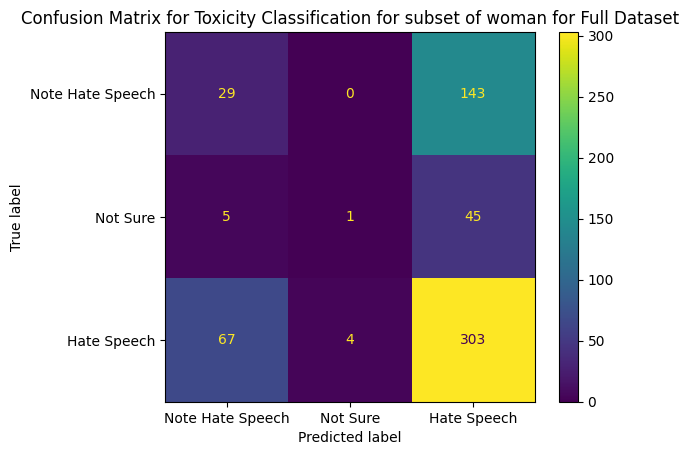

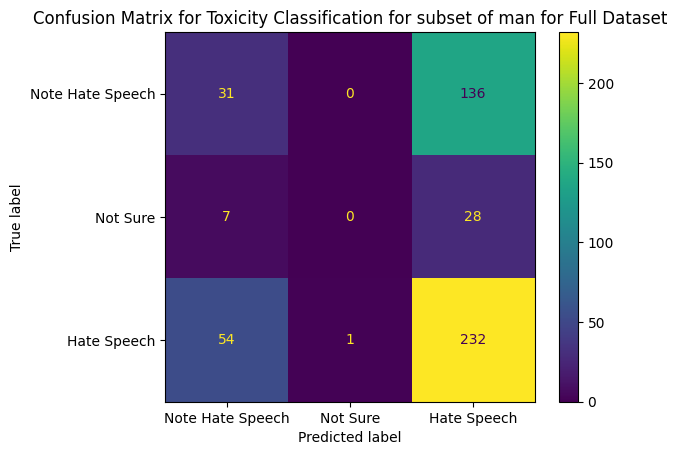

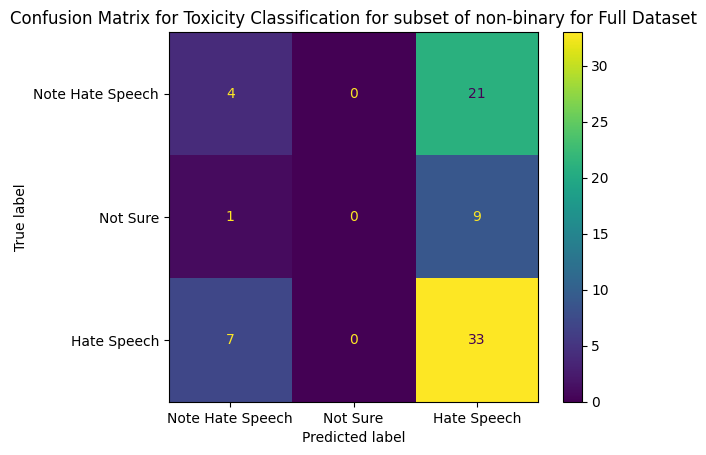

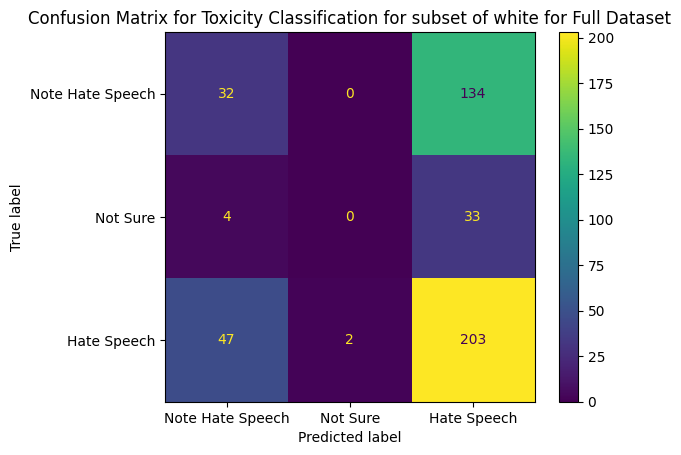

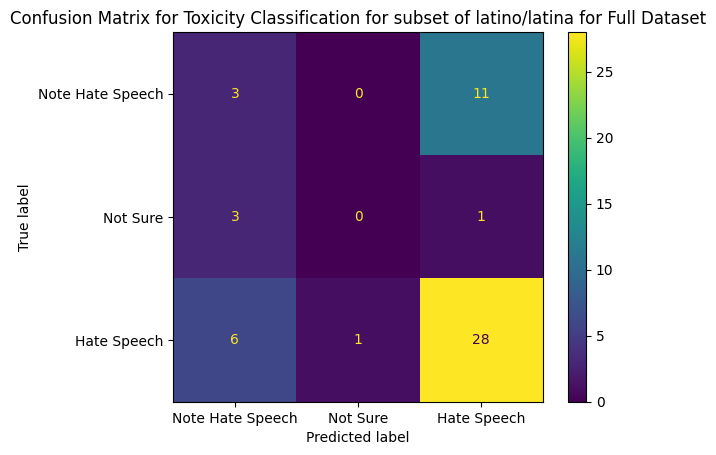

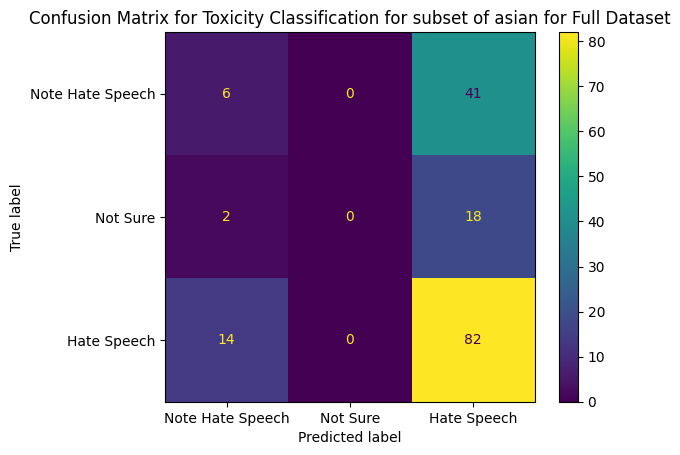

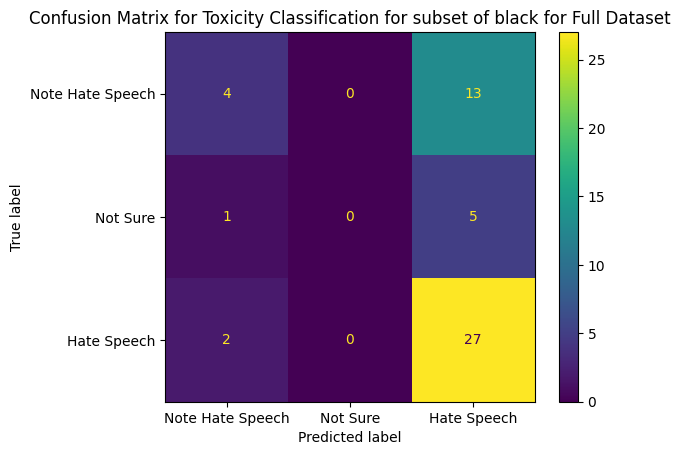

In [62]:
grouped_stats_full = group_aggregate_stats(group_values, full, "Full")

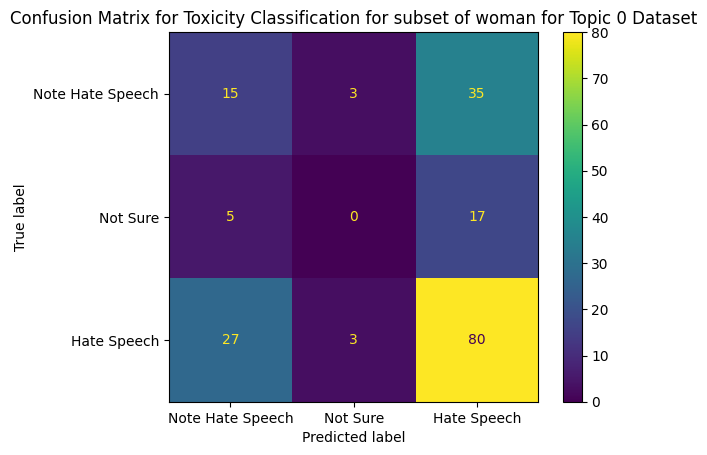

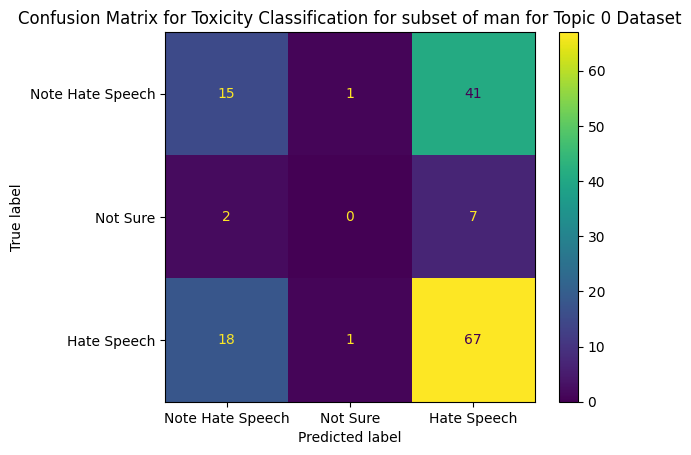

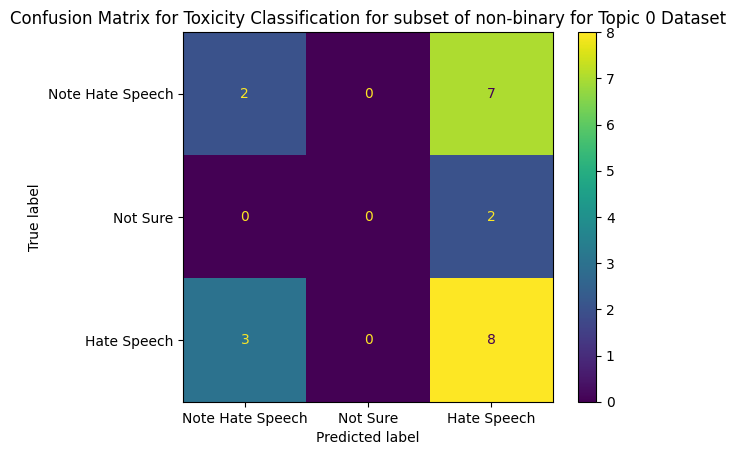

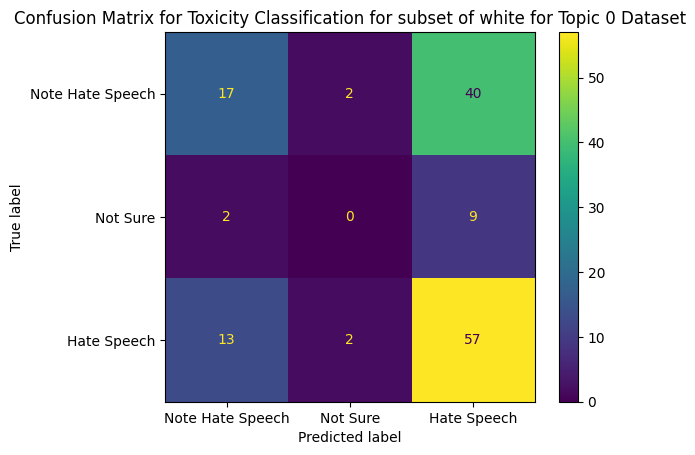

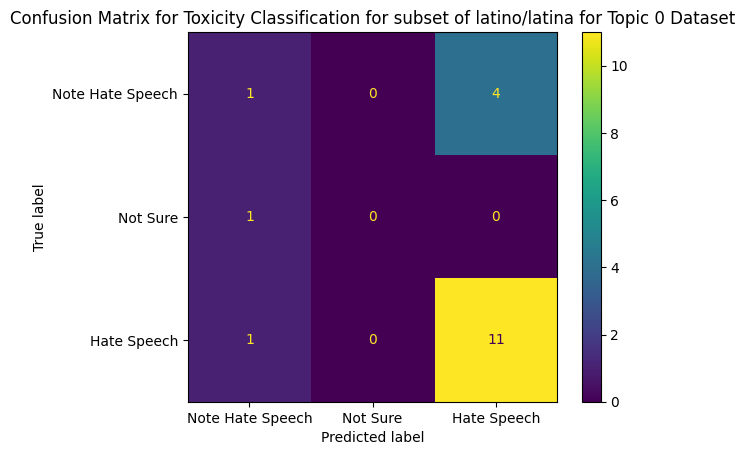

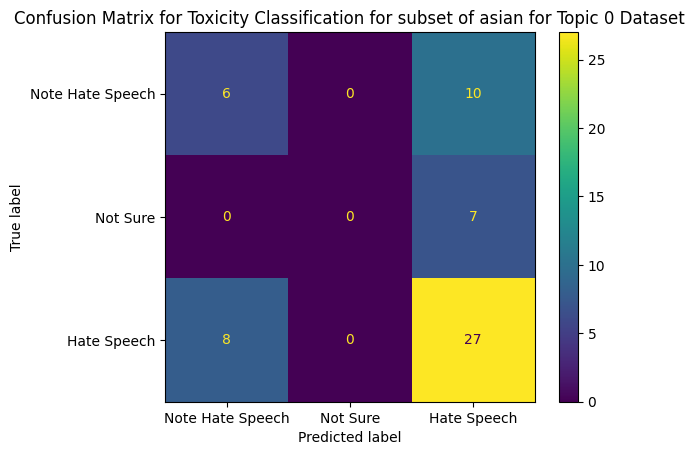

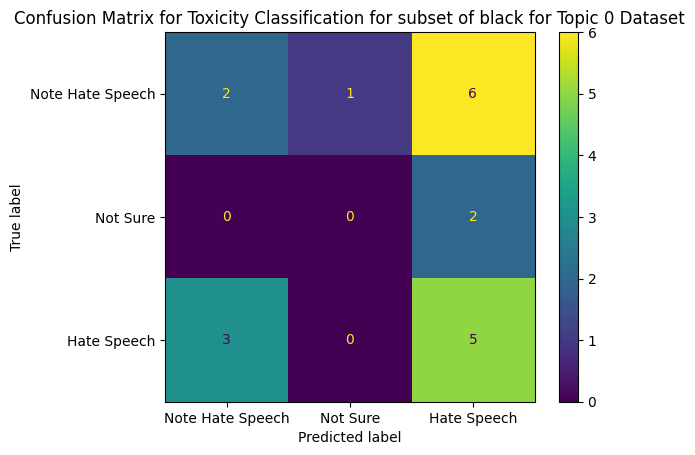

In [63]:
grouped_stats_topic_0 = group_aggregate_stats(group_values, topic_0, "Topic 0")

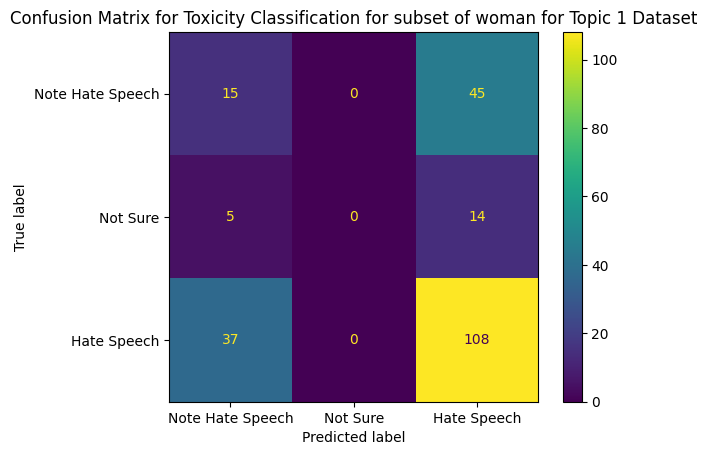

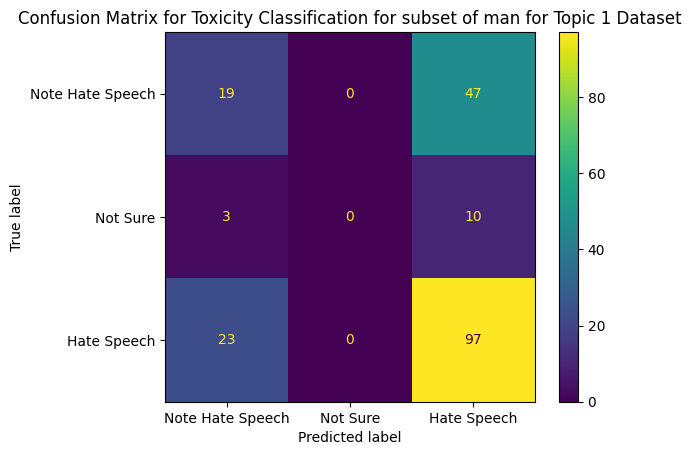

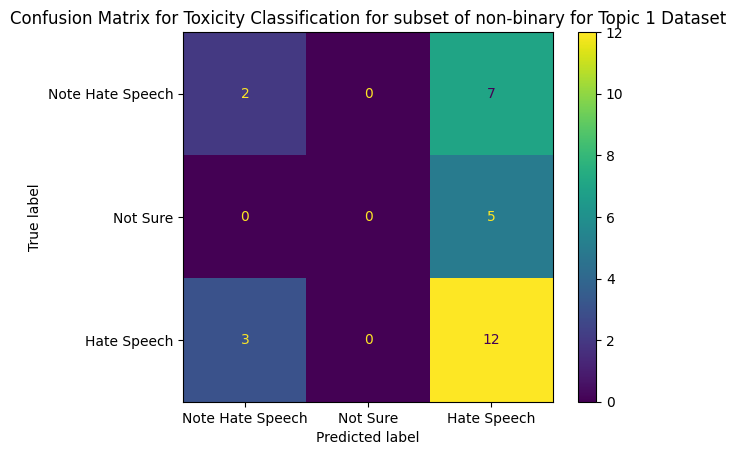

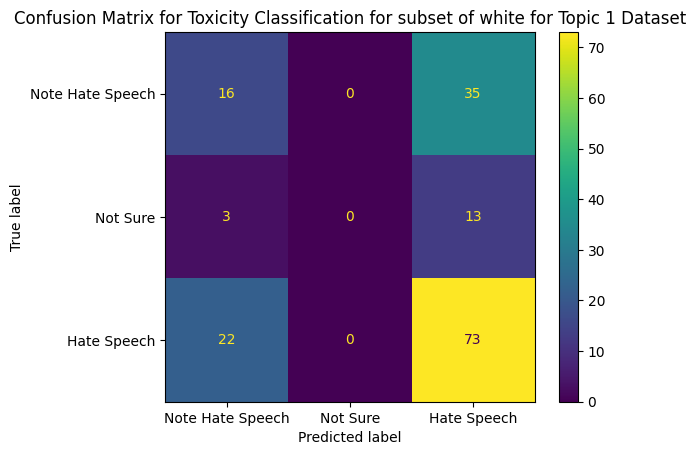

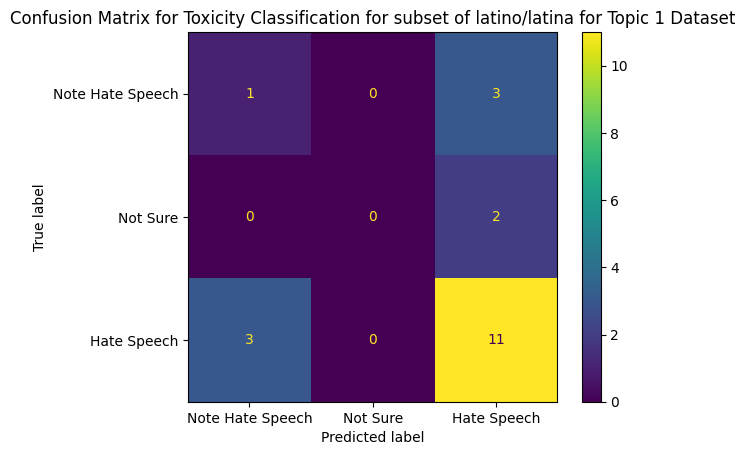

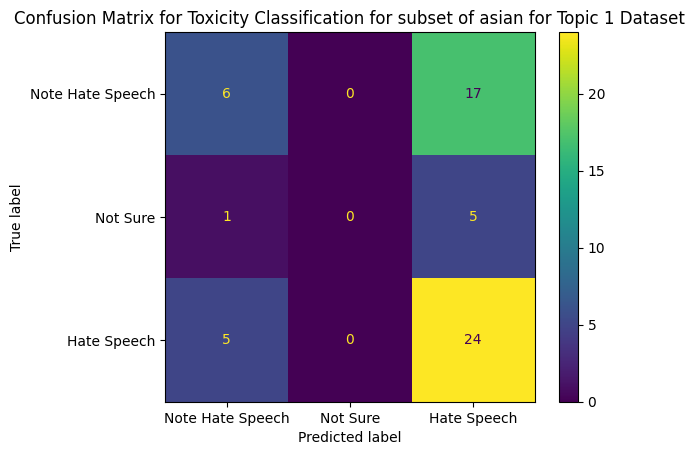

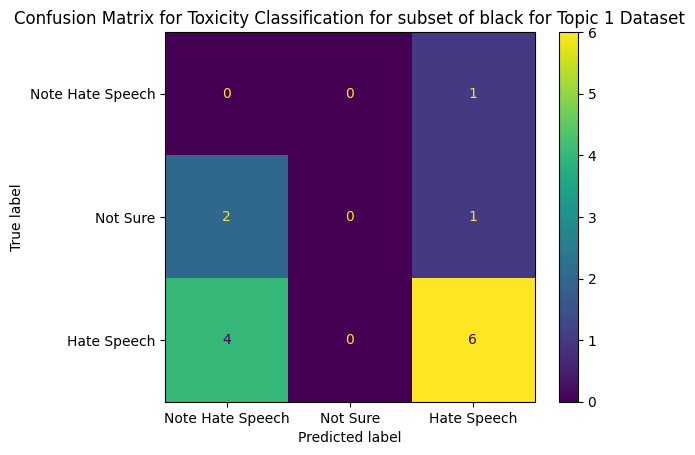

In [64]:
grouped_stats_topic_1 = group_aggregate_stats(group_values, topic_1, "Topic 1")

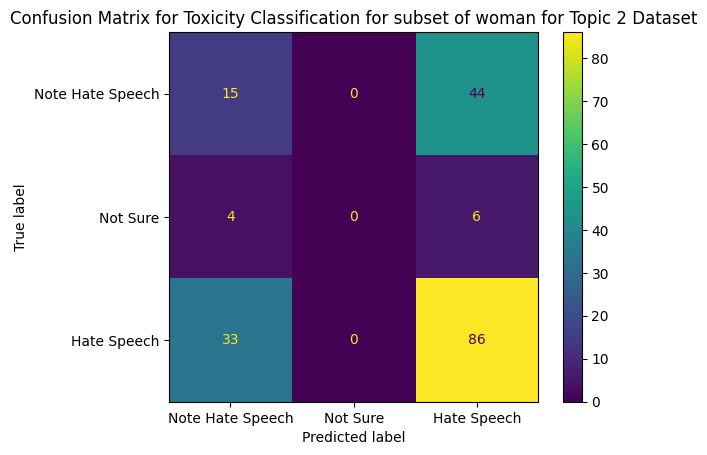

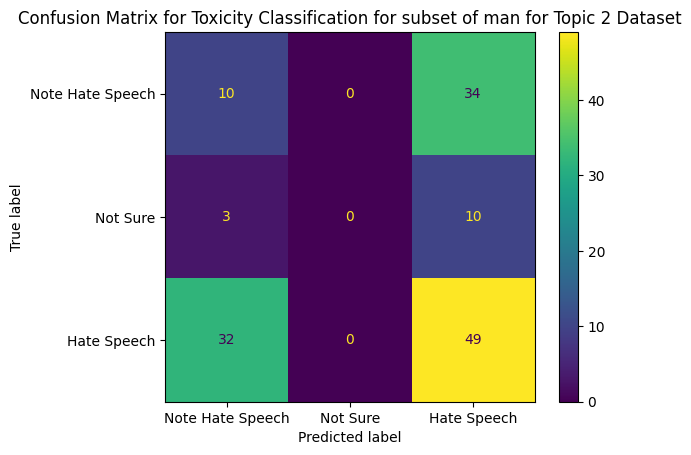

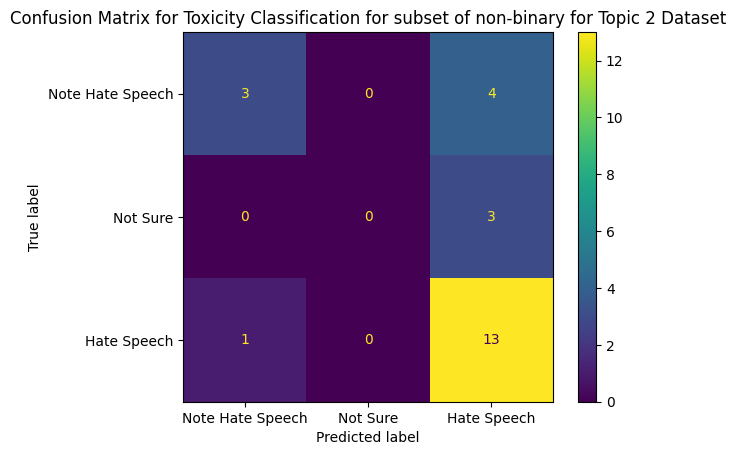

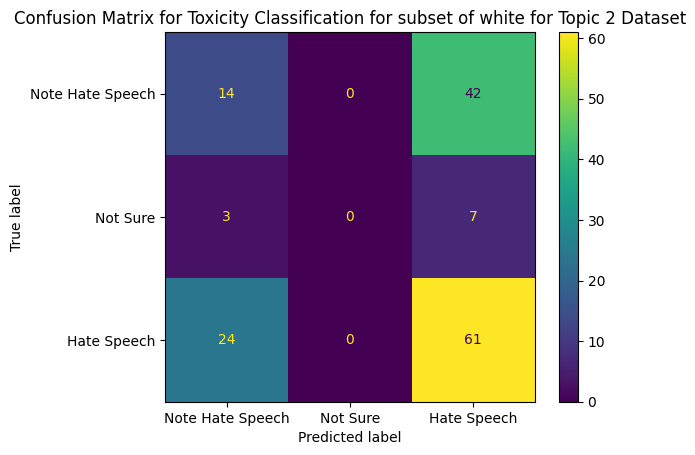

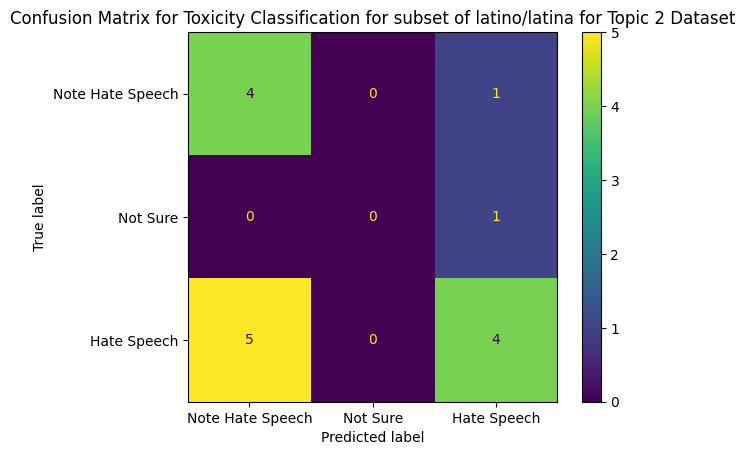

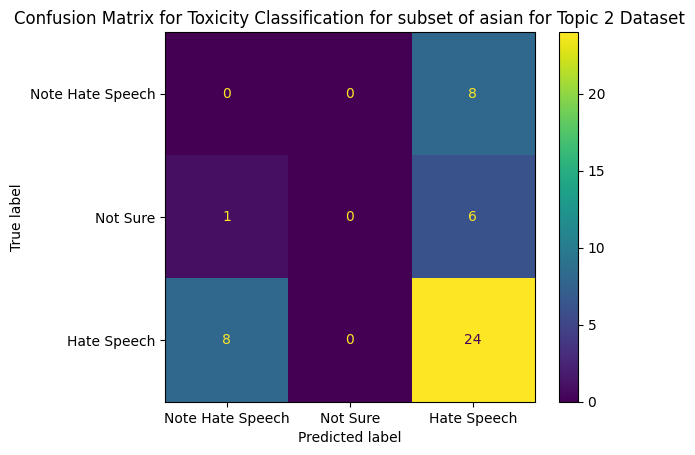

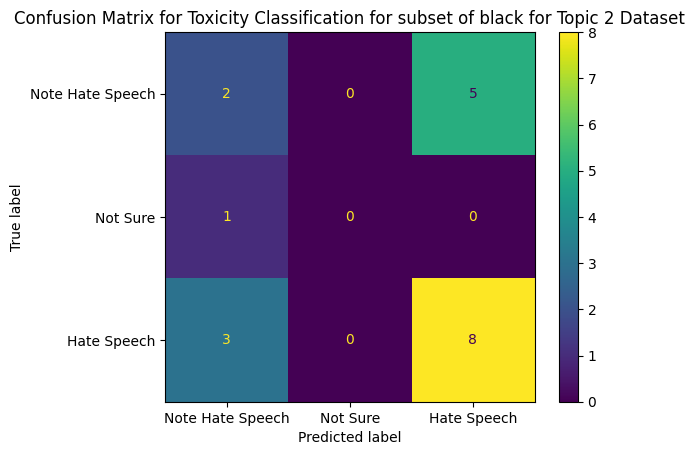

In [65]:
grouped_stats_topic_2 = group_aggregate_stats(group_values, topic_2, "Topic 2")

In [66]:
grouped_stats_full

{'gender': {'woman': {'data_subset': 'woman',
   'TPR': array([0.16860465, 0.01960784, 0.81016043]),
   'TNR': array([0.83058824, 0.99267399, 0.15695067]),
   'PPV': array([0.28712871, 0.2       , 0.61710794]),
   'NPV': array([0.71169355, 0.91554054, 0.33018868]),
   'FPR': array([0.16941176, 0.00732601, 0.84304933]),
   'FNR': array([0.83139535, 0.98039216, 0.18983957]),
   'FDR': array([0.71287129, 0.8       , 0.38289206]),
   'ACC': array([0.639866  , 0.90954774, 0.56616415]),
   'confusion_matrix': array([[ 29,   0, 143],
          [  5,   1,  45],
          [ 67,   4, 303]]),
   'Micro F1': 0.5577889447236181,
   'Precision': 0.5577889447236181,
   'Recall': 0.5577889447236181},
  'man': {'data_subset': 'man',
   'TPR': array([0.18562874, 0.        , 0.80836237]),
   'TNR': array([0.81055901, 0.99779736, 0.18811881]),
   'PPV': array([0.33695652, 0.        , 0.58585859]),
   'NPV': array([0.65743073, 0.92827869, 0.40860215]),
   'FPR': array([0.18944099, 0.00220264, 0.81188119]),

In [67]:
liss = []
for l in grouped_stats_full.values():
  for s in l.values():
    s['data'] = 'full'
    liss.append(s)
for l in grouped_stats_topic_0.values():
  for s in l.values():
    s['data'] = 'topic 0'
    liss.append(s)
for l in grouped_stats_topic_1.values():
  for s in l.values():
    s['data'] = 'topic 1'
    liss.append(s)
for l in grouped_stats_topic_2.values():
  for s in l.values():
    s['data'] = 'topic 2'
    liss.append(s)

In [68]:
df = pd.DataFrame(liss)
df[['data','data_subset', 'Micro F1', 'Precision', 'Recall']].sort_values(by=['data_subset', 'data'])

,data,data_subset,Micro F1,Precision,Recall
6,full,asian,0.539877,0.539877,0.539877
15,topic 0,asian,0.568966,0.568966,0.568966
24,topic 1,asian,0.517241,0.517241,0.517241
33,topic 2,asian,0.510638,0.510638,0.510638
7,full,black,0.596154,0.596154,0.596154
16,topic 0,black,0.368421,0.368421,0.368421
25,topic 1,black,0.428571,0.428571,0.428571
34,topic 2,black,0.526316,0.526316,0.526316
5,full,latino/latina,0.584906,0.584906,0.584906
14,topic 0,latino/latina,0.666667,0.666667,0.666667


In [69]:
df

,data_subset,TPR,TNR,PPV,NPV,FPR,FNR,FDR,ACC,confusion_matrix,Micro F1,Precision,Recall,data
0,woman,"[0.1686046511627907, 0.0196078431372549, 0.810...","[0.8305882352941176, 0.9926739926739927, 0.156...","[0.2871287128712871, 0.2, 0.6171079429735234]","[0.7116935483870968, 0.9155405405405406, 0.330...","[0.16941176470588235, 0.007326007326007326, 0....","[0.8313953488372093, 0.9803921568627451, 0.189...","[0.7128712871287128, 0.8, 0.38289205702647655]","[0.6398659966499163, 0.9095477386934674, 0.566...","[[29, 0, 143], [5, 1, 45], [67, 4, 303]]",0.557789,0.557789,0.557789,full
1,man,"[0.18562874251497005, 0.0, 0.8083623693379791]","[0.8105590062111802, 0.9977973568281938, 0.188...","[0.33695652173913043, 0.0, 0.5858585858585859]","[0.6574307304785895, 0.9282786885245902, 0.408...","[0.18944099378881987, 0.0022026431718061676, 0...","[0.8143712574850299, 1.0, 0.1916376306620209]","[0.6630434782608695, 1.0, 0.41414141414141414]","[0.5971370143149284, 0.9263803680981595, 0.552...","[[31, 0, 136], [7, 0, 28], [54, 1, 232]]",0.537832,0.537832,0.537832,full
2,non-binary,"[0.16, 0.0, 0.825]","[0.84, 1.0, 0.14285714285714285]","[0.3333333333333333, nan, 0.5238095238095238]","[0.6666666666666666, 0.8666666666666667, 0.416...","[0.16, 0.0, 0.8571428571428571]","[0.84, 1.0, 0.175]","[0.6666666666666666, nan, 0.47619047619047616]","[0.6133333333333333, 0.8666666666666667, 0.506...","[[4, 0, 21], [1, 0, 9], [7, 0, 33]]",0.493333,0.493333,0.493333,full
3,white,"[0.1927710843373494, 0.0, 0.8055555555555556]","[0.8235294117647058, 0.9952153110047847, 0.177...","[0.3855421686746988, 0.0, 0.5486486486486486]","[0.6397849462365591, 0.9183222958057395, 0.423...","[0.17647058823529413, 0.004784688995215311, 0....","[0.8072289156626506, 1.0, 0.19444444444444445]","[0.6144578313253012, 1.0, 0.45135135135135135]","[0.5934065934065934, 0.9142857142857143, 0.525...","[[32, 0, 134], [4, 0, 33], [47, 2, 203]]",0.516484,0.516484,0.516484,full
4,native american,"[nan, 0.0, 0.9]","[0.9166666666666666, 1.0, 0.0]","[0.0, nan, 0.8181818181818182]","[1.0, 0.8333333333333334, 0.0]","[0.08333333333333333, 0.0, 1.0]","[nan, 1.0, 0.1]","[1.0, nan, 0.18181818181818182]","[0.9166666666666666, 0.8333333333333334, 0.75]","[[0, 0, 0], [0, 0, 2], [1, 0, 9]]",0.750000,0.750000,0.750000,full
5,latino/latina,"[0.21428571428571427, 0.0, 0.8]","[0.7692307692307693, 0.9795918367346939, 0.333...","[0.25, 0.0, 0.7]","[0.7317073170731707, 0.9230769230769231, 0.461...","[0.23076923076923078, 0.02040816326530612, 0.6...","[0.7857142857142857, 1.0, 0.2]","[0.75, 1.0, 0.3]","[0.6226415094339622, 0.9056603773584906, 0.641...","[[3, 0, 11], [3, 0, 1], [6, 1, 28]]",0.584906,0.584906,0.584906,full
6,asian,"[0.1276595744680851, 0.0, 0.8541666666666666]","[0.8620689655172413, 1.0, 0.11940298507462686]","[0.2727272727272727, nan, 0.5815602836879432]","[0.7092198581560284, 0.8773006134969326, 0.363...","[0.13793103448275862, 0.0, 0.8805970149253731]","[0.8723404255319149, 1.0, 0.14583333333333334]","[0.7272727272727273, nan, 0.41843971631205673]","[0.6503067484662577, 0.8773006134969326, 0.552...","[[6, 0, 41], [2, 0, 18], [14, 0, 82]]",0.539877,0.539877,0.539877,full
7,black,"[0.23529411764705882, 0.0, 0.9310344827586207]","[0.9142857142857143, 1.0, 0.21739130434782608]","[0.5714285714285714, nan, 0.6]","[0.7111111111111111, 0.8846153846153846, 0.714...","[0.08571428571428572, 0.0, 0.782608695652174]","[0.7647058823529411, 1.0, 0.06896551724137931]","[0.42857142857142855, nan, 0.4]","[0.6923076923076923, 0.8846153846153846, 0.615...","[[4, 0, 13], [1, 0, 5], [2, 0, 27]]",0.596154,0.596154,0.596154,full
8,pacific islander,"[0.0, 1.0]","[1.0, 0.0]","[nan, 0.5714285714285714]","[0.5714285714285714, nan]","[0.0, 1.0]","[1.0, 0.0]","[nan, 0.42857142857142855]","[0.5714285714285714, 0.5714285714285714]","[[0, 3], [0, 4]]",0.571429,0.571429,0.571429,full
9,woman,"[0.2830188679245283, 0.0, 0.7272727272727273]","[0.7575757575757576, 0.9631901840490797, 0.306...","[0.3191489361702128, 0.0, 0.6060606

##HateBERT

In [70]:
full = pd.read_csv('results/hatebert/full/metric_results-full-seed-0-frozen.csv').sort_values(by=['annotator_id']).drop(['predictions'], axis=1)
full = aggregate_runs('hatebert', 'full', full)

topic_0 = pd.read_csv('results/hatebert/topic-0/metric_results-topic-0-seed-0-frozen.csv').sort_values(by=['annotator_id']).drop(['predictions'], axis=1)
topic_0 = aggregate_runs('hatebert', 'topic-0', topic_0)

topic_1 = pd.read_csv('results/hatebert/topic-1/metric_results-topic-1-seed-0-frozen.csv').sort_values(by=['annotator_id']).drop(['predictions'], axis=1)
topic_1 = aggregate_runs('hatebert', 'topic-1', topic_1)

topic_2 = pd.read_csv('results/hatebert/topic-2/metric_results-topic-2-seed-0-frozen.csv').sort_values(by=['annotator_id']).drop(['predictions'], axis=1)
topic_2 = aggregate_runs('hatebert', 'topic-2', topic_2)

{'data_subset': 'Full', 'TPR': array([0.23831776, 0.00847458, 0.72966781]), 'TNR': array([0.74167508, 0.9923136 , 0.24358974]), 'PPV': array([0.2849162 , 0.09090909, 0.60666667]), 'NPV': array([0.6927427 , 0.91690341, 0.3604336 ]), 'FPR': array([0.25832492, 0.0076864 , 0.75641026]), 'FNR': array([0.76168224, 0.99152542, 0.27033219]), 'FDR': array([0.7150838 , 0.90909091, 0.39333333]), 'ACC': array([0.58985201, 0.91050035, 0.54263566]), 'confusion_matrix': array([[102,   6, 320],
       [ 24,   1,  93],
       [232,   4, 637]]), 'Micro F1': 0.5214940098661028, 'Precision': 0.5214940098661028, 'Recall': 0.5214940098661028}


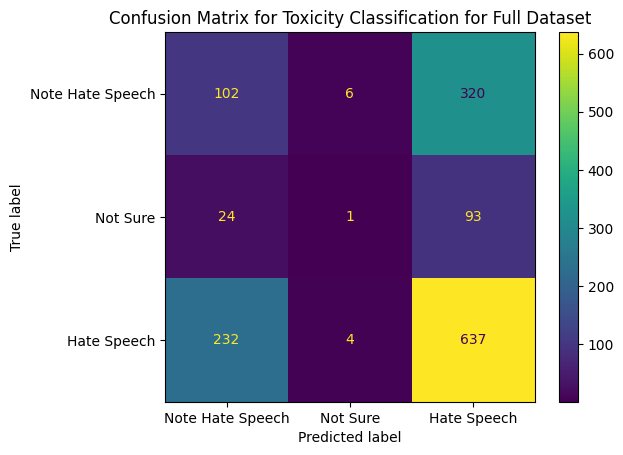

{'data_subset': 'Topic 0', 'TPR': array([0.30882353, 0.        , 0.70930233]), 'TNR': array([0.73737374, 0.96954315, 0.32571429]), 'PPV': array([0.35      , 0.        , 0.60797342]), 'NPV': array([0.69968051, 0.90736342, 0.43181818]), 'FPR': array([0.26262626, 0.03045685, 0.67428571]), 'FNR': array([0.69117647, 1.        , 0.29069767]), 'FDR': array([0.65      , 1.        , 0.39202658]), 'ACC': array([0.60277136, 0.88221709, 0.55427252]), 'confusion_matrix': array([[ 42,   5,  89],
       [ 10,   0,  29],
       [ 68,   7, 183]]), 'Micro F1': 0.5196304849884527, 'Precision': 0.5196304849884527, 'Recall': 0.5196304849884527}


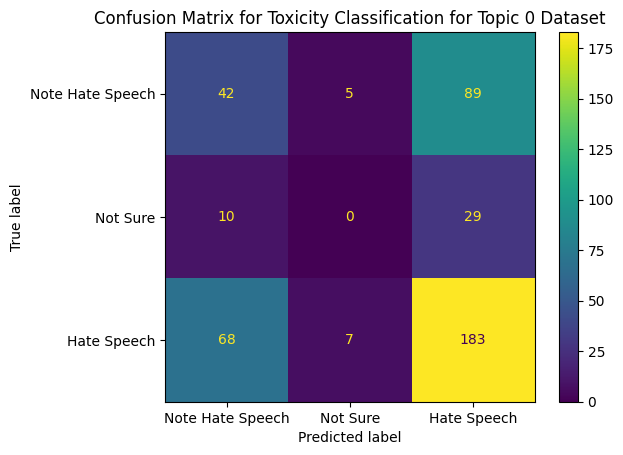

{'data_subset': 'Topic 1', 'TPR': array([0.25925926, 0.        , 0.74127907]), 'TNR': array([0.74677003, 1.        , 0.24878049]), 'PPV': array([0.3       ,        nan, 0.62347188]), 'NPV': array([0.70660147, 0.92167577, 0.36428571]), 'FPR': array([0.25322997, 0.        , 0.75121951]), 'FNR': array([0.74074074, 1.        , 0.25872093]), 'FDR': array([0.7       ,        nan, 0.37652812]), 'ACC': array([0.60291439, 0.92167577, 0.55737705]), 'confusion_matrix': array([[ 42,   0, 120],
       [  9,   0,  34],
       [ 89,   0, 255]]), 'Micro F1': 0.5409836065573771, 'Precision': 0.5409836065573771, 'Recall': 0.5409836065573771}


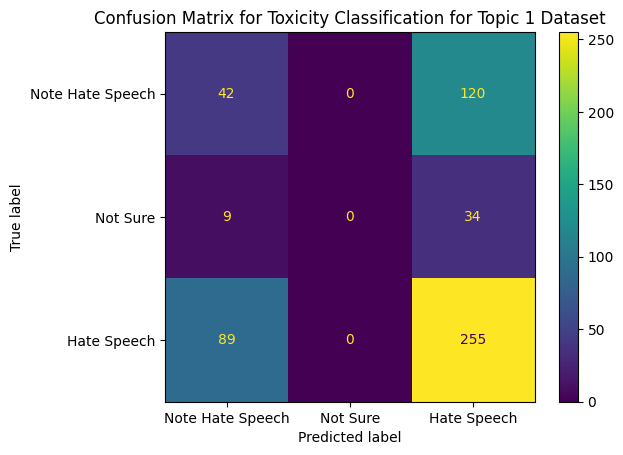

{'data_subset': 'Topic 2', 'TPR': array([0.26923077, 0.02777778, 0.67527675]), 'TNR': array([0.68403909, 0.99002494, 0.29518072]), 'PPV': array([0.26515152, 0.2       , 0.61      ]), 'NPV': array([0.68852459, 0.91898148, 0.35766423]), 'FPR': array([0.31596091, 0.00997506, 0.70481928]), 'FNR': array([0.73076923, 0.97222222, 0.32472325]), 'FDR': array([0.73484848, 0.8       , 0.39      ]), 'ACC': array([0.56064073, 0.91075515, 0.53089245]), 'confusion_matrix': array([[ 35,   3,  92],
       [ 10,   1,  25],
       [ 87,   1, 183]]), 'Micro F1': 0.5011441647597255, 'Precision': 0.5011441647597255, 'Recall': 0.5011441647597255}


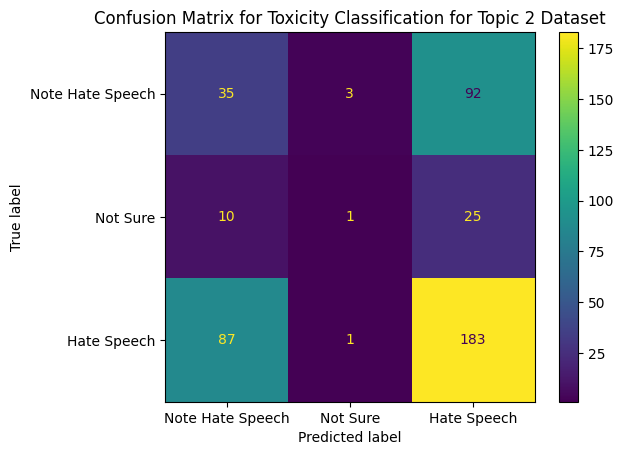

In [71]:
full_stats = performance_stats(full['labels'], full['predictions'], 'Full')
print(full_stats)
confusion_visualization(full['labels'], full['predictions'], 'Full')

topic_0_stats = performance_stats(topic_0['labels'], topic_0['predictions'], 'Topic 0')
print(topic_0_stats)
confusion_visualization(topic_0['labels'], topic_0['predictions'], 'Topic 0')

topic_1_stats = performance_stats(topic_1['labels'], topic_1['predictions'], 'Topic 1')
print(topic_1_stats)
confusion_visualization(topic_1['labels'], topic_1['predictions'], 'Topic 1')

topic_2_stats = performance_stats(topic_2['labels'], topic_2['predictions'], 'Topic 2')
print(topic_2_stats)
confusion_visualization(topic_2['labels'], topic_2['predictions'], 'Topic 2')


In [72]:
df = pd.DataFrame([full_stats, topic_0_stats, topic_1_stats, topic_2_stats])
df[['data_subset', 'Micro F1', 'Precision', 'Recall']]

,data_subset,Micro F1,Precision,Recall
0,Full,0.521494,0.521494,0.521494
1,Topic 0,0.519630,0.519630,0.519630
2,Topic 1,0.540984,0.540984,0.540984
3,Topic 2,0.501144,0.501144,0.501144


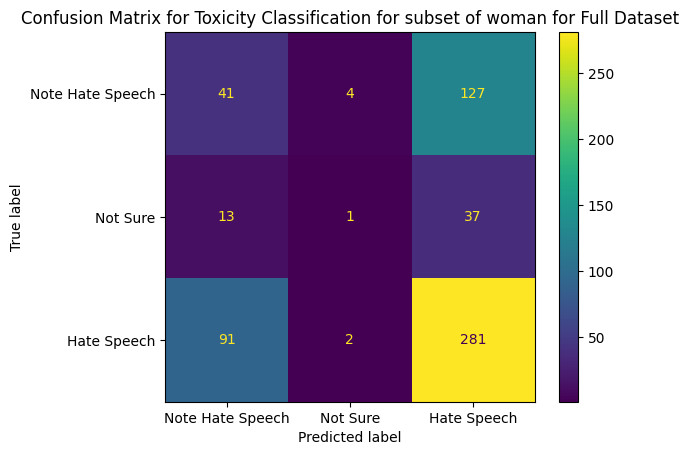

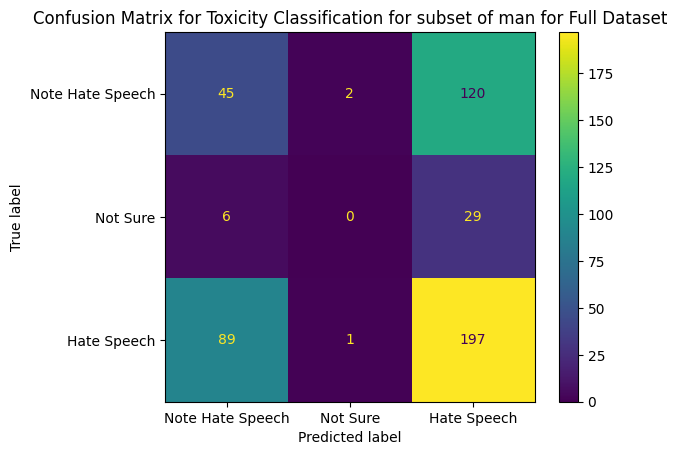

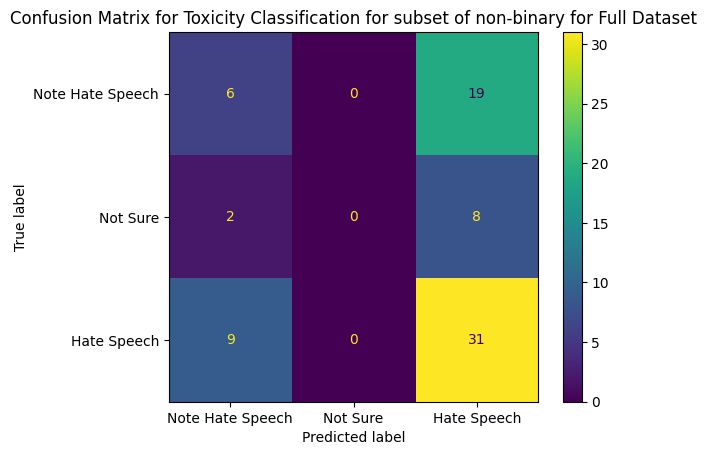

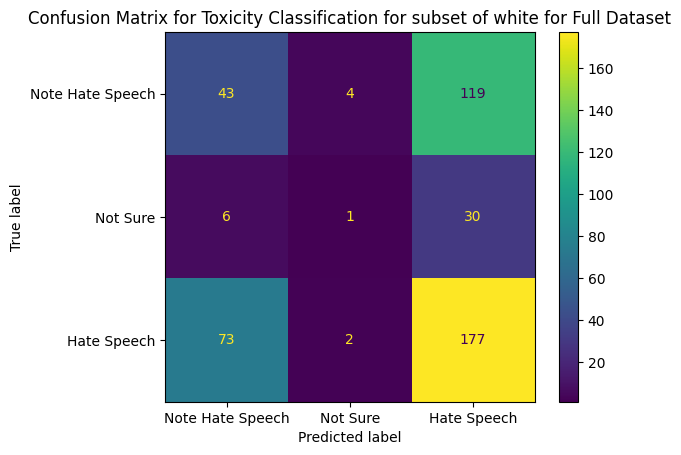

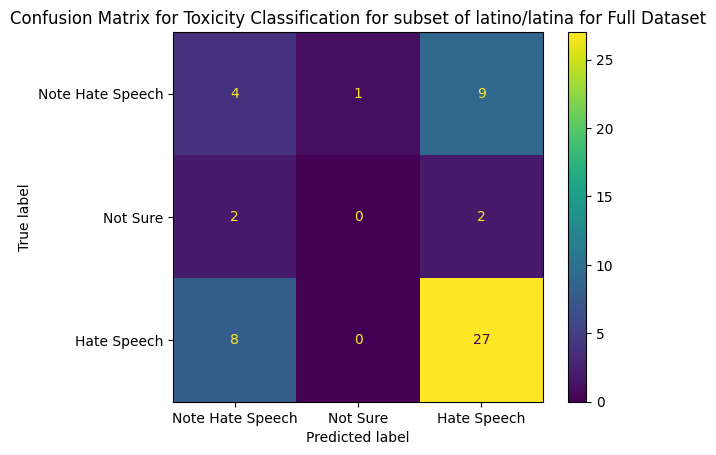

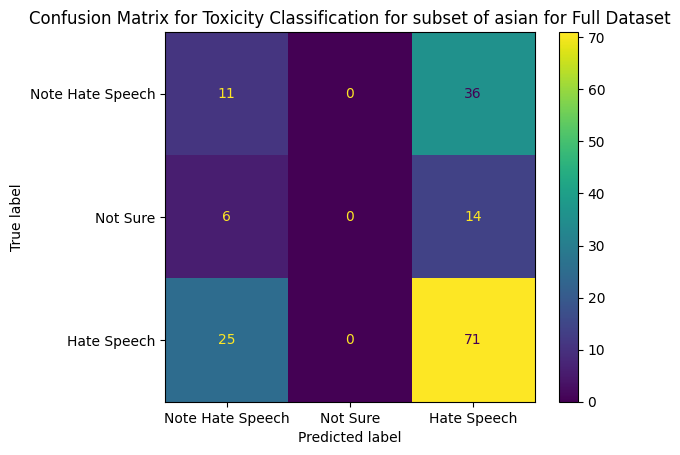

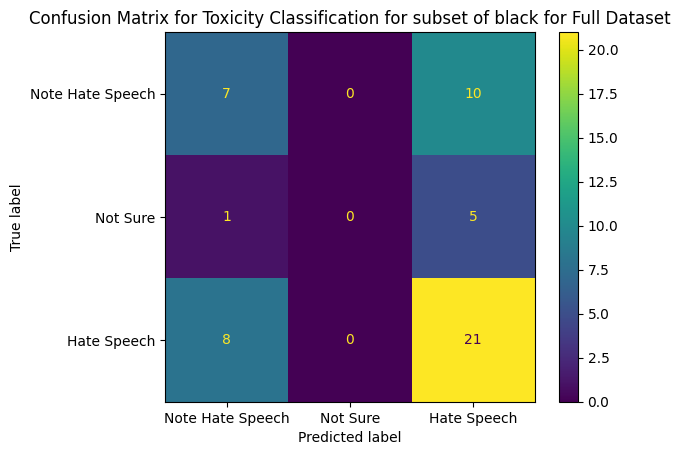

In [73]:
grouped_stats_full = group_aggregate_stats(group_values, full, "Full")

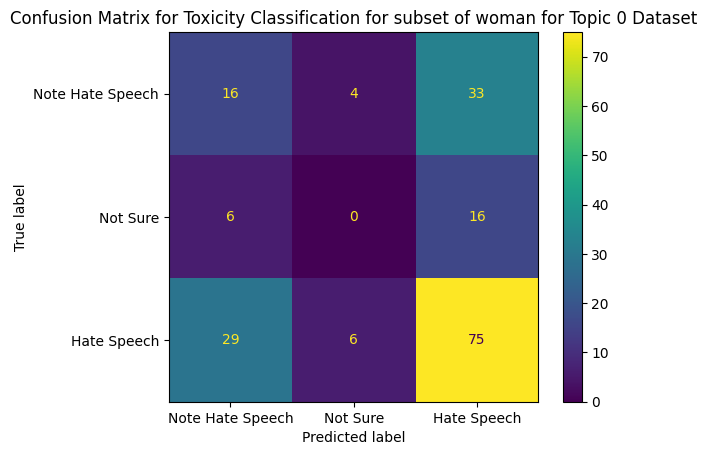

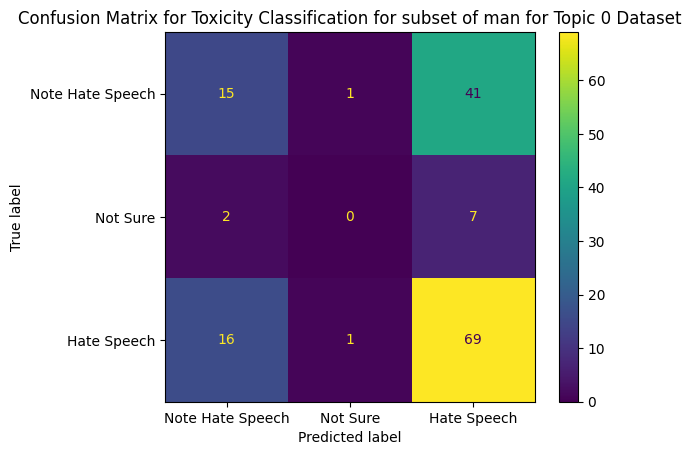

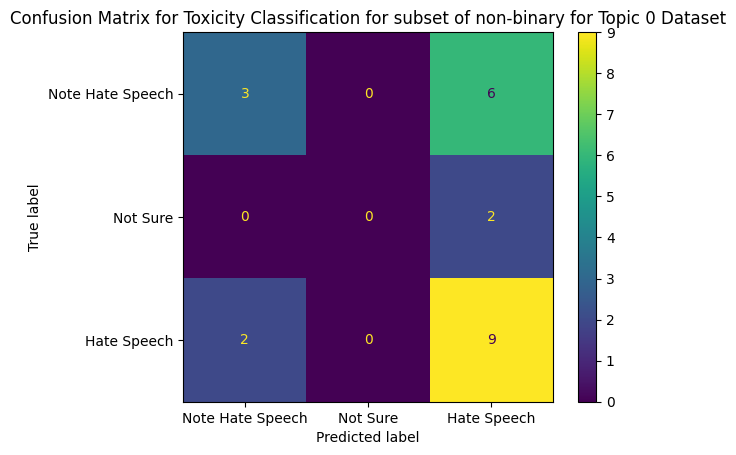

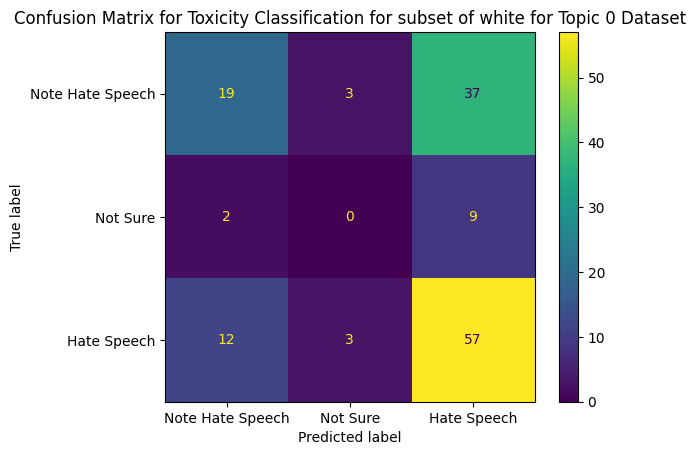

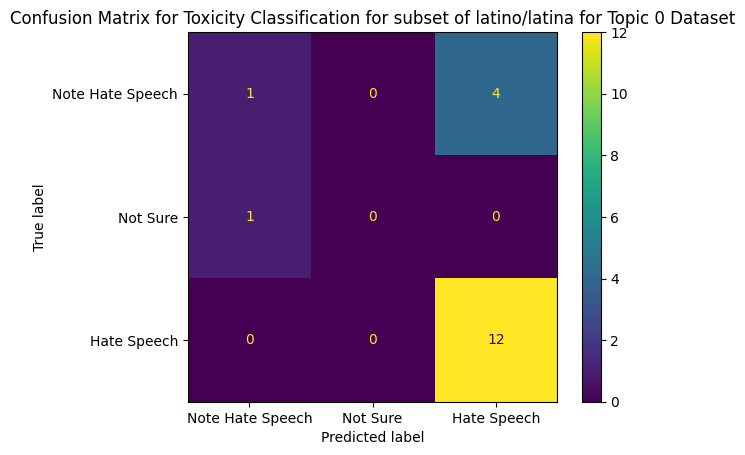

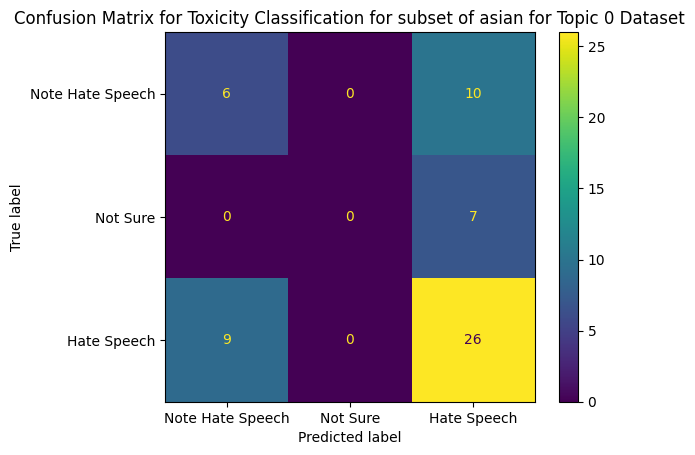

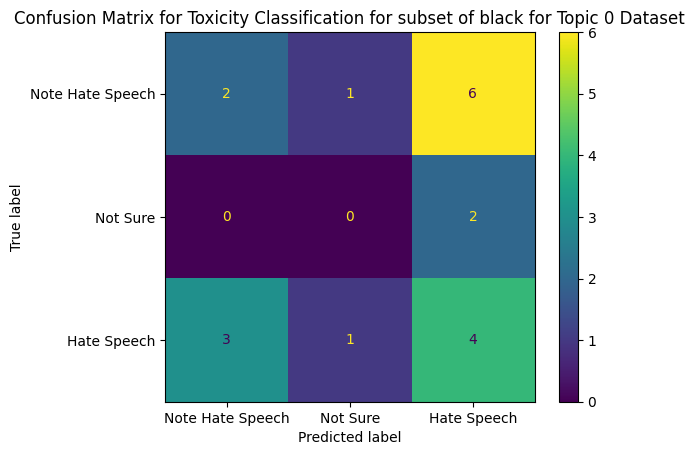

In [74]:
grouped_stats_topic_0 = group_aggregate_stats(group_values, topic_0, "Topic 0")

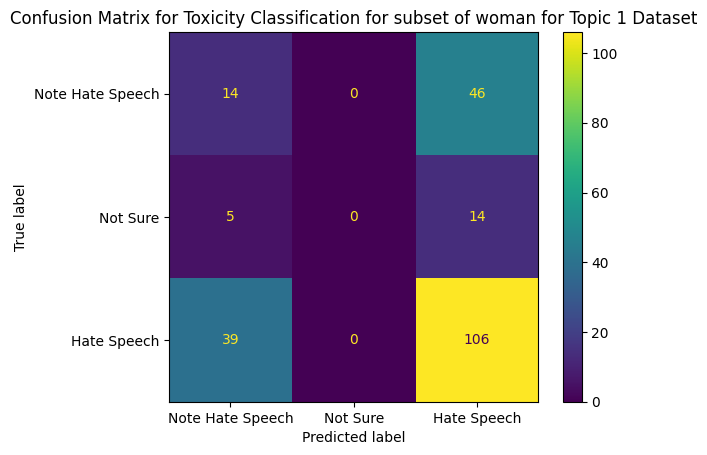

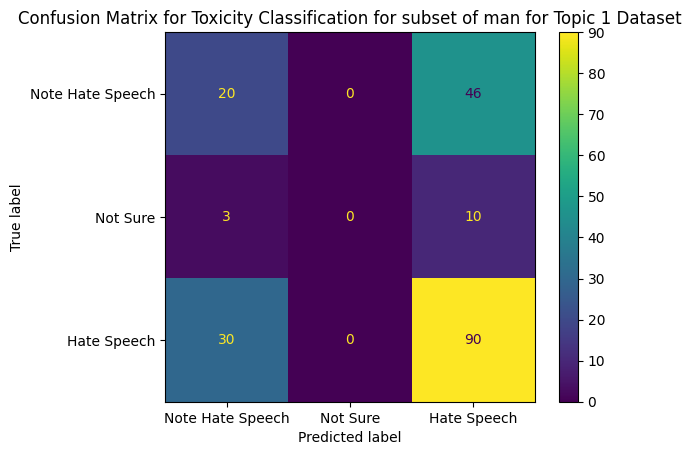

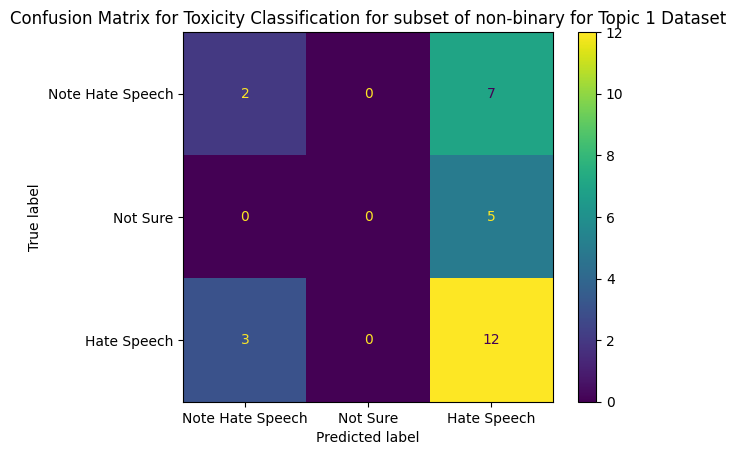

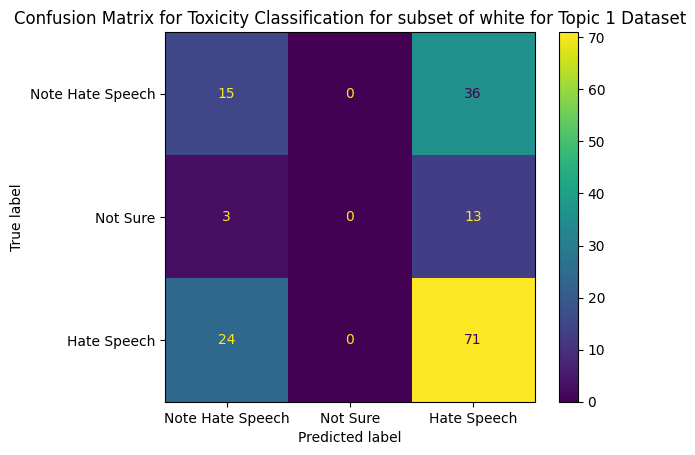

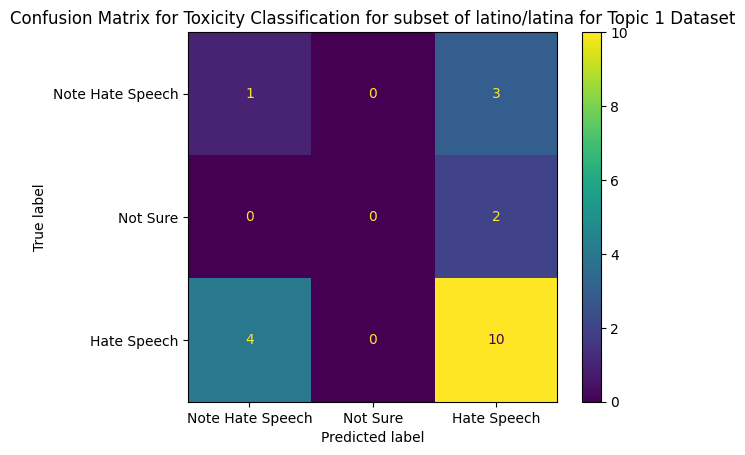

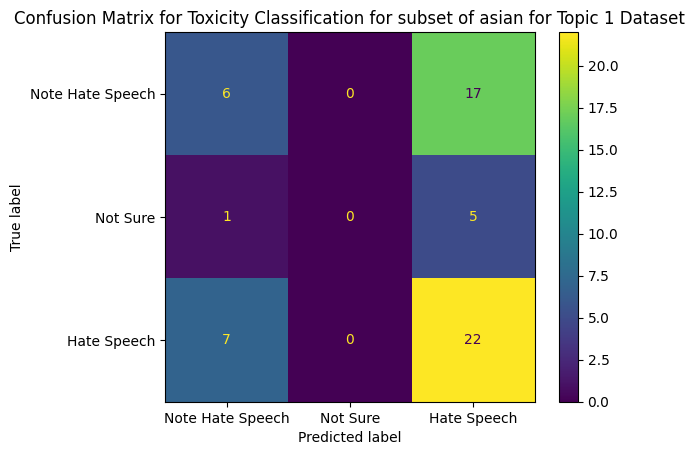

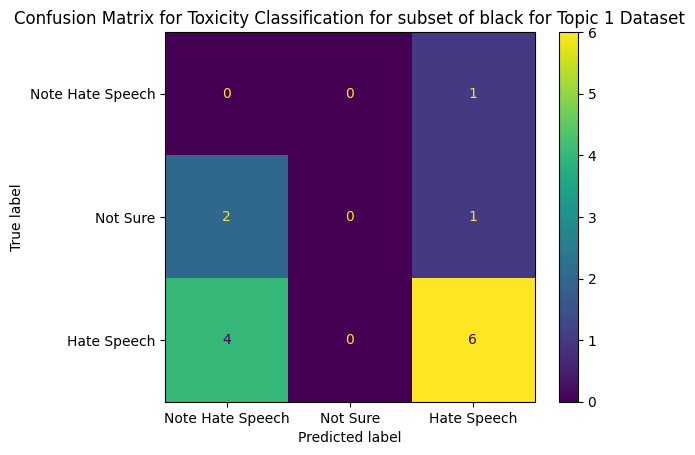

In [75]:
grouped_stats_topic_1 = group_aggregate_stats(group_values, topic_1, "Topic 1")

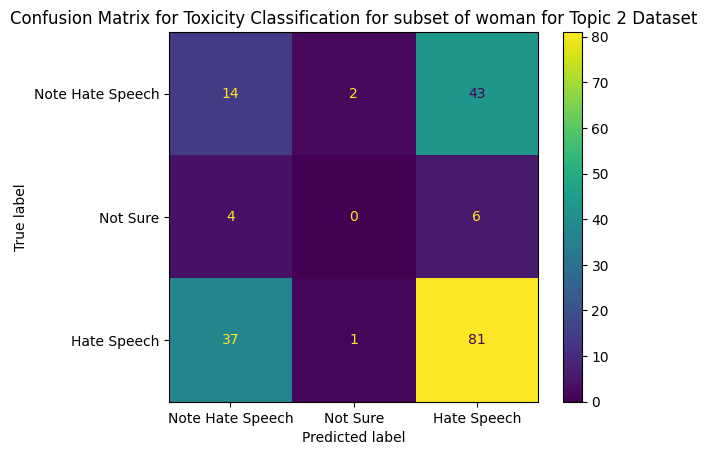

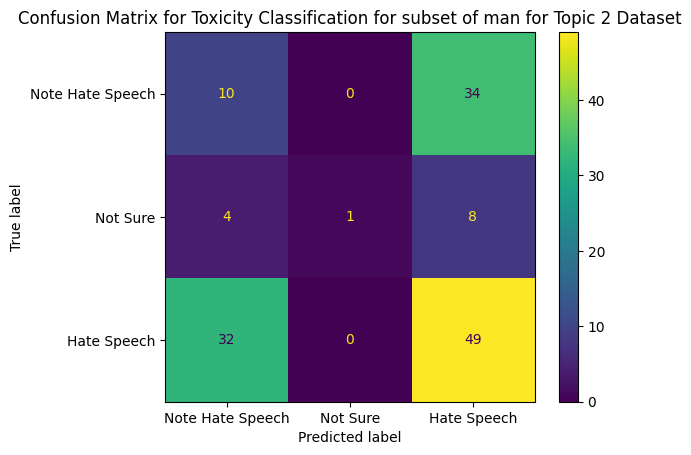

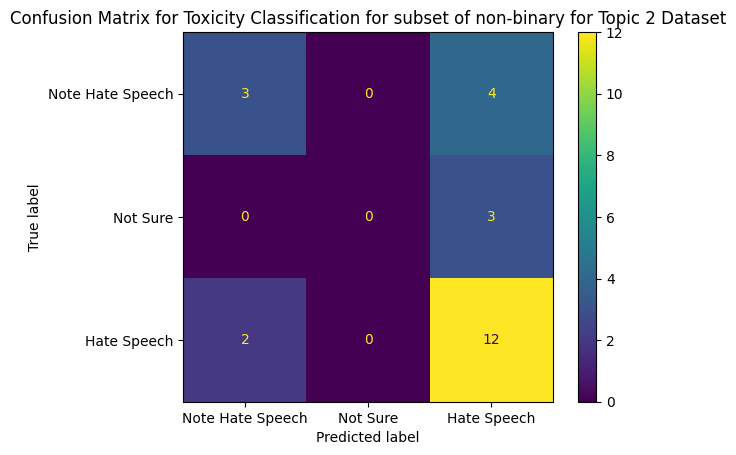

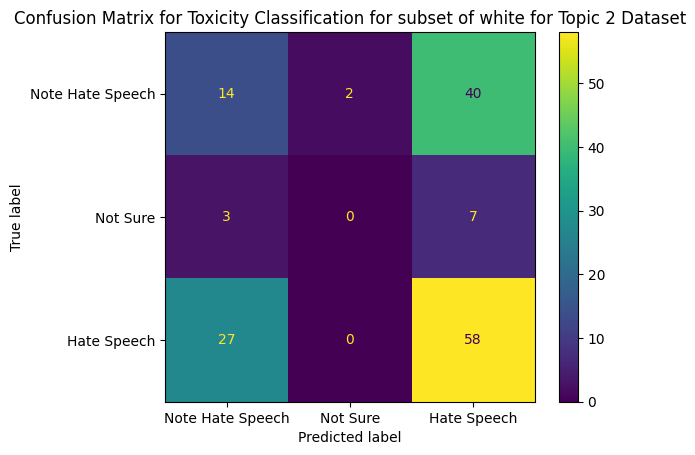

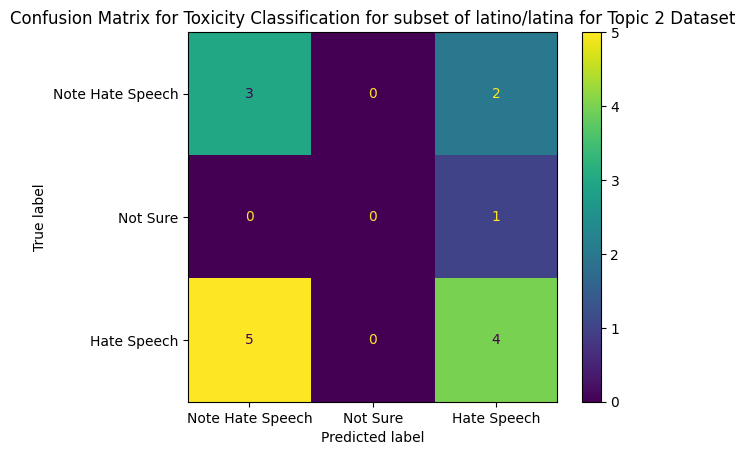

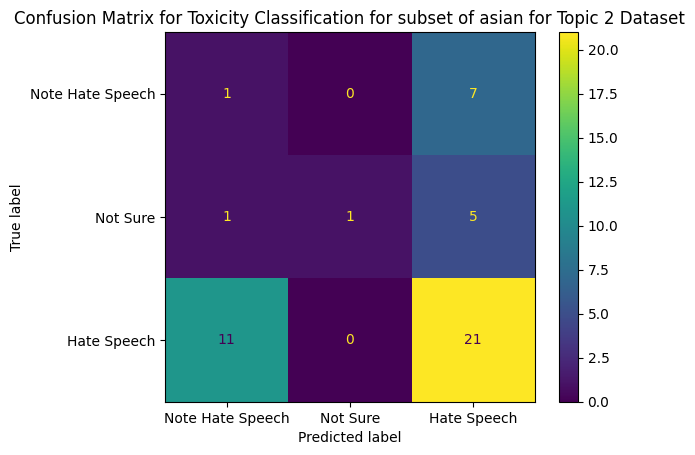

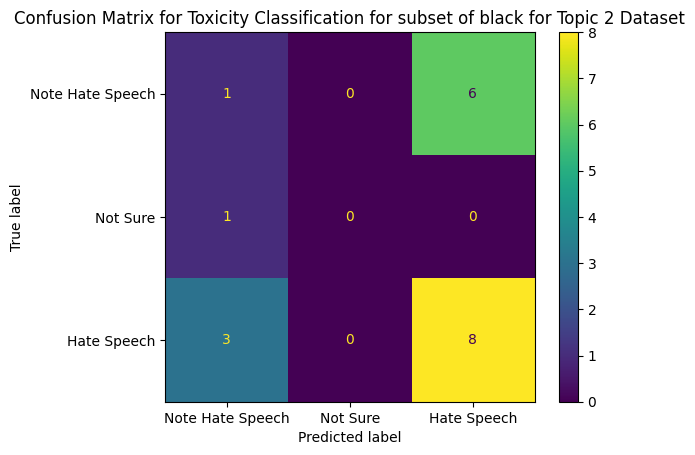

In [76]:
grouped_stats_topic_2 = group_aggregate_stats(group_values, topic_2, "Topic 2")

In [77]:
grouped_stats_full

{'gender': {'woman': {'data_subset': 'woman',
   'TPR': array([0.23837209, 0.01960784, 0.7513369 ]),
   'TNR': array([0.75529412, 0.98901099, 0.26457399]),
   'PPV': array([0.28275862, 0.14285714, 0.63146067]),
   'NPV': array([0.71017699, 0.91525424, 0.38815789]),
   'FPR': array([0.24470588, 0.01098901, 0.73542601]),
   'FNR': array([0.76162791, 0.98039216, 0.2486631 ]),
   'FDR': array([0.71724138, 0.85714286, 0.36853933]),
   'ACC': array([0.60636516, 0.90619765, 0.56951424]),
   'confusion_matrix': array([[ 41,   4, 127],
          [ 13,   1,  37],
          [ 91,   2, 281]]),
   'Micro F1': 0.541038525963149,
   'Precision': 0.541038525963149,
   'Recall': 0.541038525963149},
  'man': {'data_subset': 'man',
   'TPR': array([0.26946108, 0.        , 0.68641115]),
   'TNR': array([0.70496894, 0.99339207, 0.26237624]),
   'PPV': array([0.32142857, 0.        , 0.56936416]),
   'NPV': array([0.6504298 , 0.92798354, 0.37062937]),
   'FPR': array([0.29503106, 0.00660793, 0.73762376]),
  

## Topic Analysis Breakdown

In [78]:
topic_0_train = pd.read_csv('data/toxicity_processed_train_topic_0.csv')
topic_0_val = pd.read_csv('data/toxicity_processed_val_topic_0.csv')
topic_0_test = pd.read_csv('data/toxicity_processed_test_topic_0.csv')
topic_0 = pd.concat([topic_0_train, topic_0_val, topic_0_test], axis=0)

topic_1_train = pd.read_csv('data/toxicity_processed_train_topic_1.csv')
topic_1_val = pd.read_csv('data/toxicity_processed_val_topic_1.csv')
topic_1_test = pd.read_csv('data/toxicity_processed_test_topic_1.csv')
topic_1 = pd.concat([topic_1_train, topic_1_val, topic_1_test], axis=0)


topic_2_train = pd.read_csv('data/toxicity_processed_train_topic_2.csv')
topic_2_val = pd.read_csv('data/toxicity_processed_val_topic_2.csv')
topic_2_test = pd.read_csv('data/toxicity_processed_test_topic_2.csv')
topic_2 = pd.concat([topic_2_train, topic_2_val, topic_2_test], axis=0)



In [79]:
topic_0.columns

Index(['action', 'litw', 'dynahate', 'perspective', 'rewire', 'hateroberta',
       'gpt4', 'gender', 'ethnicity', 'annotator_id'],
      dtype='object')

In [80]:
print("Topic 0 total examples: ", len(topic_0))
print("occurances of 'Not Hate Speech':", topic_0['litw'].value_counts()[-1.0])
print("occurances of 'Hate Speech':", topic_0['litw'].value_counts()[1.0])
print("occurances of 'Not Sure':", topic_0['litw'].value_counts()[0.0])
print('ratio of hate to not hate: ', topic_0['litw'].value_counts()[1.0]/ (topic_0['litw'].value_counts()[1.0] + topic_0['litw'].value_counts()[-1.0]))

Topic 0 total examples:  2197
occurances of 'Not Hate Speech': 739
occurances of 'Hate Speech': 1261
occurances of 'Not Sure': 197
ratio of hate to not hate:  0.6305


In [81]:
print("Topic 1 total examples: ", len(topic_1))
print("occurances of 'Not Hate Speech':", topic_1['litw'].value_counts()[-1.0])
print("occurances of 'Hate Speech':", topic_1['litw'].value_counts()[1.0])
print("occurances of 'Not Sure':", topic_1['litw'].value_counts()[0.0])
print('ratio of hate to not hate: ', topic_1['litw'].value_counts()[1.0]/ (topic_1['litw'].value_counts()[1.0] + topic_1['litw'].value_counts()[-1.0]))

Topic 1 total examples:  2611
occurances of 'Not Hate Speech': 801
occurances of 'Hate Speech': 1585
occurances of 'Not Sure': 225
ratio of hate to not hate:  0.6642917015926236


In [82]:
print("Topic 2 total examples: ", len(topic_2))
print("occurances of 'Not Hate Speech':", topic_2['litw'].value_counts()[-1.0])
print("occurances of 'Hate Speech':", topic_2['litw'].value_counts()[1.0])
print("occurances of 'Not Sure':", topic_2['litw'].value_counts()[0.0])
print('ratio of hate to not hate: ', topic_2['litw'].value_counts()[1.0]/ (topic_2['litw'].value_counts()[1.0] + topic_2['litw'].value_counts()[-1.0]))

Topic 2 total examples:  2286
occurances of 'Not Hate Speech': 711
occurances of 'Hate Speech': 1374
occurances of 'Not Sure': 201
ratio of hate to not hate:  0.6589928057553956


In [83]:
nlp_pos = pd.read_csv("data/nlpositionality_toxicity_processed.csv")
print("NLP Positionality total examples: ", len(nlp_pos))
print("occurances of 'Not Hate Speech':", nlp_pos['litw'].value_counts()[-1.0])
print("occurances of 'Hate Speech':", nlp_pos['litw'].value_counts()[1.0])
print("occurances of 'Not Sure':", nlp_pos['litw'].value_counts()[0.0])
print('ratio of hate to not hate: ', nlp_pos['litw'].value_counts()[1.0]/ (nlp_pos['litw'].value_counts()[1.0] + nlp_pos['litw'].value_counts()[-1.0]))

NLP Positionality total examples:  7094
occurances of 'Not Hate Speech': 2251
occurances of 'Hate Speech': 4220
occurances of 'Not Sure': 623
ratio of hate to not hate:  0.6521403183433782


In [84]:
liss = []
for l in grouped_stats_full.values():
  for s in l.values():
    s['data'] = 'full'
    liss.append(s)
for l in grouped_stats_topic_0.values():
  for s in l.values():
    s['data'] = 'topic 0'
    liss.append(s)
for l in grouped_stats_topic_1.values():
  for s in l.values():
    s['data'] = 'topic 1'
    liss.append(s)
for l in grouped_stats_topic_2.values():
  for s in l.values():
    s['data'] = 'topic 2'
    liss.append(s)

In [85]:
df = pd.DataFrame(liss)
df[['data', 'data_subset', 'Micro F1', 'Precision', 'Recall']].sort_values(by=['data_subset', 'data'])

,data,data_subset,Micro F1,Precision,Recall
6,full,asian,0.503067,0.503067,0.503067
15,topic 0,asian,0.551724,0.551724,0.551724
24,topic 1,asian,0.482759,0.482759,0.482759
33,topic 2,asian,0.489362,0.489362,0.489362
7,full,black,0.538462,0.538462,0.538462
16,topic 0,black,0.315789,0.315789,0.315789
25,topic 1,black,0.428571,0.428571,0.428571
34,topic 2,black,0.473684,0.473684,0.473684
5,full,latino/latina,0.584906,0.584906,0.584906
14,topic 0,latino/latina,0.722222,0.722222,0.722222


In [88]:
print(df[['data', 'data_subset', 'Micro F1', 'Precision', 'Recall']].sort_values(by=['data_subset', 'data']).to_string(index=False))

   data      data_subset  Micro F1  Precision   Recall
   full            asian  0.503067   0.503067 0.503067
topic 0            asian  0.551724   0.551724 0.551724
topic 1            asian  0.482759   0.482759 0.482759
topic 2            asian  0.489362   0.489362 0.489362
   full            black  0.538462   0.538462 0.538462
topic 0            black  0.315789   0.315789 0.315789
topic 1            black  0.428571   0.428571 0.428571
topic 2            black  0.473684   0.473684 0.473684
   full    latino/latina  0.584906   0.584906 0.584906
topic 0    latino/latina  0.722222   0.722222 0.722222
topic 1    latino/latina  0.550000   0.550000 0.550000
topic 2    latino/latina  0.466667   0.466667 0.466667
   full              man  0.494888   0.494888 0.494888
topic 0              man  0.552632   0.552632 0.552632
topic 1              man  0.552764   0.552764 0.552764
topic 2              man  0.434783   0.434783 0.434783
   full  native american  0.666667   0.666667 0.666667
topic 0  n